In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:
#download the weather images and put them in a directory
path = r'C:\Users\Hiroshi\Documents\06-2024 ClimateWins\01 Data\Task2.5'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [3]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [4]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [5]:
if train_generator is None or test_generator is None:
    print("Generator is not properly initialized.")
else:
    print("Number of images in train_generator:", train_generator.n)
    print("Number of images in test_generator:", test_generator.n)

Number of images in train_generator: 901
Number of images in test_generator: 224


In [6]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 40, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size-1,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size-1,
)

train_generator.n // train_generator.batch_size - 1

Epoch 1/40


C:\Users\Hiroshi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4969 - loss: 0.1424 - val_accuracy: 0.6510 - val_loss: 0.1393
Epoch 2/40
 2/27 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6641 - loss: 0.1039

C:\Users\Hiroshi\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6134 - loss: 0.1253 - val_accuracy: 0.6250 - val_loss: 0.1209
Epoch 3/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7331 - loss: 0.0906 - val_accuracy: 0.7500 - val_loss: 0.0996
Epoch 4/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7627 - loss: 0.0855 - val_accuracy: 0.7812 - val_loss: 0.0807
Epoch 5/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8276 - loss: 0.0686 - val_accuracy: 0.8177 - val_loss: 0.0732
Epoch 6/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.7951 - loss: 0.0688 - val_accuracy: 0.7500 - val_loss: 0.0858
Epoch 7/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8146 - loss: 0.0723 - val_accuracy: 0.8385 - val_loss: 0.0641
Epoch 8/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9074 - loss: 0.0353 - val_accuracy: 0.7188 - val_loss: 0.1076
Epoch 9/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8244 - loss: 0.0625 - val_accuracy: 0.7292 - val_loss: 0.0896

27

In [7]:
results = pd.DataFrame(model.history.history)

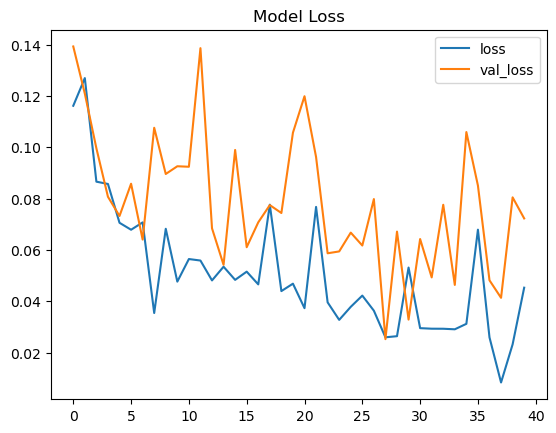

In [8]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

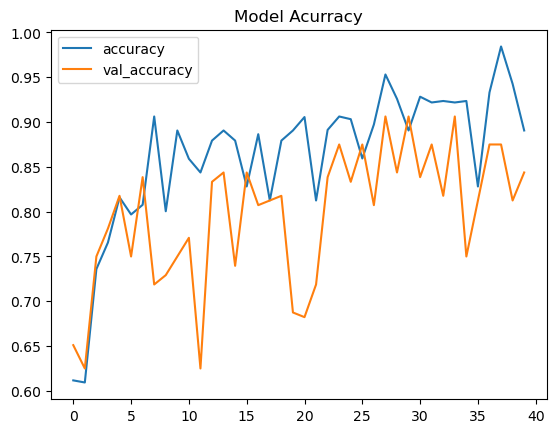

In [9]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [10]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.890625, Val_Accuracy: 0.84375
Loss: 0.04532306641340256, Val_Loss: 0.07229618728160858


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step


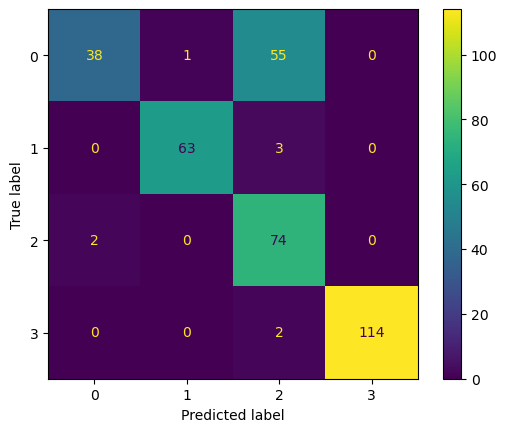

In [11]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [12]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


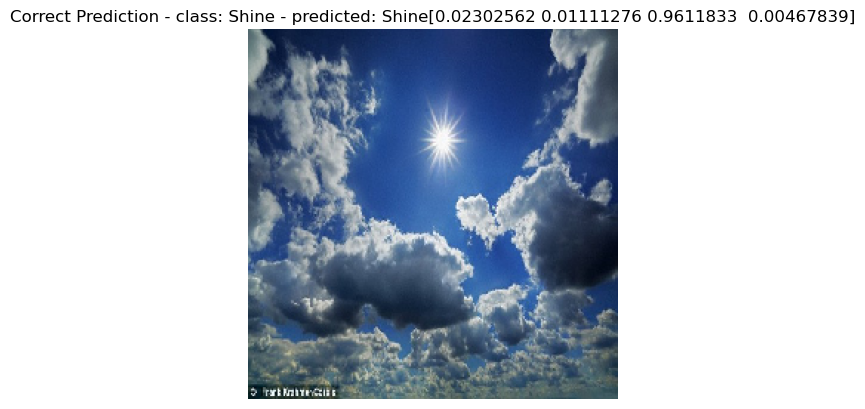

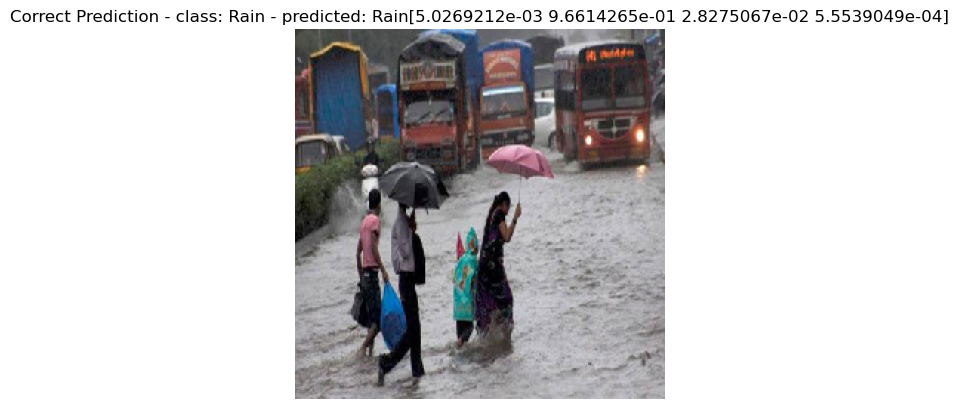

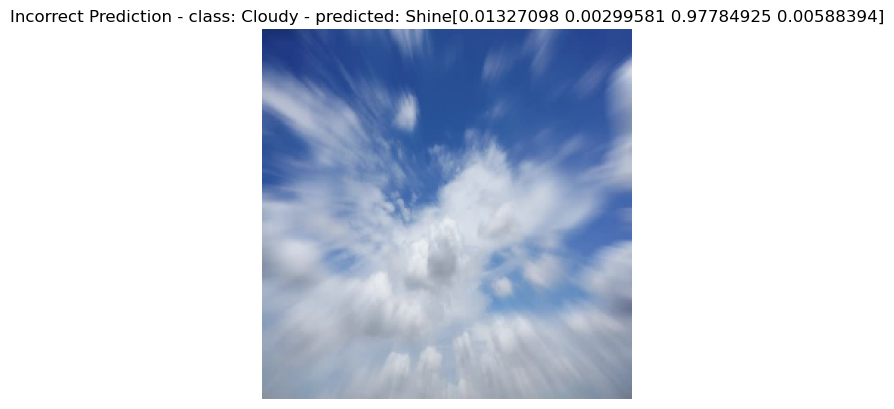

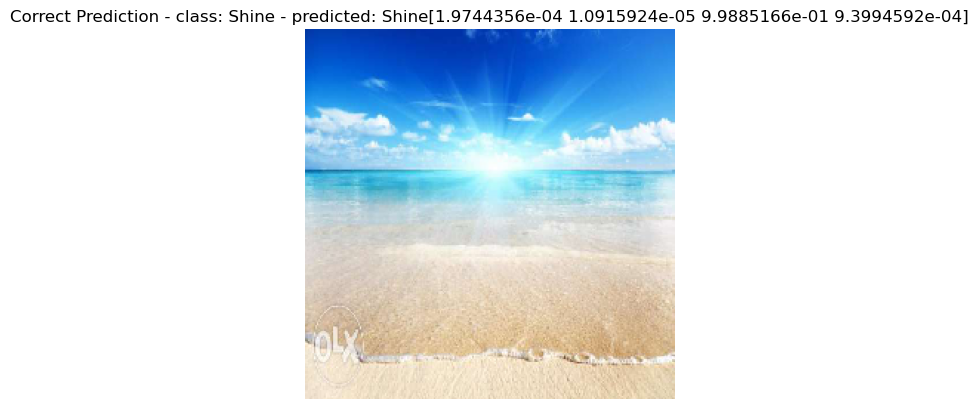

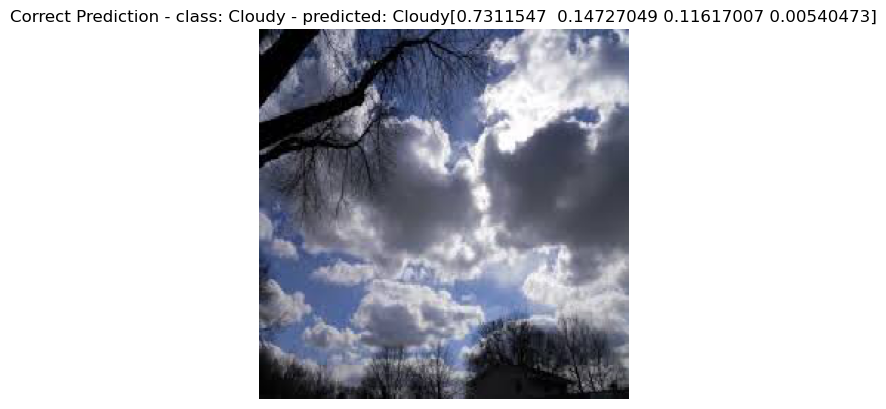

In [27]:
predict_one(model, 5) #<--you can show multiple pictures with this command. Just fill in the number you want to see.